In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD # Gradient 구현한 클래스

In [27]:
df = pd.read_csv('data/cars.csv')
df.columns = ['speed','dist'] # 컬럼명 변경(speed:자동차속도, dist:제동거리)

x_data = df['speed'].values # 자동차 속도
y_data = df['dist'].values  # 자동차 제동거리
df.head(4)

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22


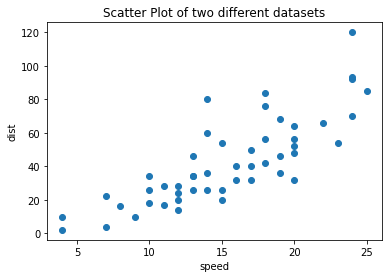

In [22]:
# 산점도 (Scatter plot)는 두 변수의 상관 관계를 직교 좌표계의 평면에 점으로 표현하는 그래프
plt.xlabel("speed")
plt.ylabel("dist")
plt.title("Scatter Plot of two different datasets")
plt.scatter(x_data, y_data)
plt.show()

In [5]:
# 텐서 생성
x = tf.constant(x_data, tf.float32)
y = tf.constant(y_data, tf.float32)

In [6]:
w = tf.Variable(tf.random.uniform([1])) # 랜덤하게 임의 1개의 값
b = tf.Variable(tf.random.uniform([1]))

In [7]:
def compute_cost(): # Mean Square Error
    hx = w * x + b
    cost = tf.reduce_mean( (hx-y)**2 )
    return cost

hist_cost = []
optimizer = SGD(learning_rate=0.001)
for i in range(2000): # 2000번 학습
    optimizer.minimize(compute_cost, var_list = [w,b] )
    cost = compute_cost().numpy()
    hist_cost.append(cost)
    # print(i,' cost: ',cost)
    
print("w:", w.numpy(), " b:", b.numpy())

최종W: [3.2416625]  최종B: [-5.7172446]


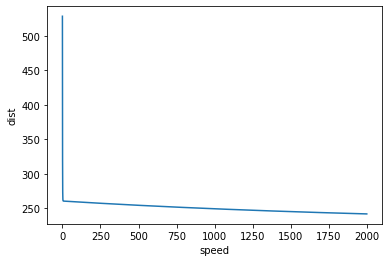

In [9]:
plt.xlabel("speed")
plt.ylabel("dist")
plt.plot(hist_cost)

In [12]:
def hxFn(car_speed):
    xd = np.float32(car_speed)
    hx = w *xd + b
    return hx.numpy()

car_speed = 10
car_dist = hxFn(car_speed)
print('자동차_속도:',car_speed, ' | 자동차_제동거리(m):',car_dist)

자동차_속도: 10  | 자동차_제동거리(m): [26.69938]


자동차_속도: [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  | 자동차_제동거리(m): [ 26.69938  59.11601  91.53263 123.94926 156.36589 188.78252 221.19914
 253.61577 286.03238 318.449  ]


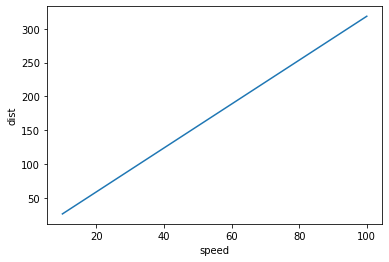

In [15]:
car_speed = [10,20,30,40,50,60,70,80,90,100]
car_dist = hxFn(car_speed)
print('자동차_속도:',car_speed, ' | 자동차_제동거리(m):',car_dist)

# 자동차 속도에 제동거리는 정비례하는 것을 알 수 있다.
plt.xlabel("speed")
plt.ylabel("dist")
plt.plot(car_speed, car_dist)

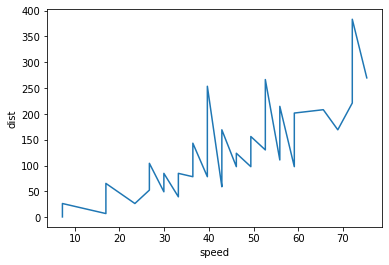

In [17]:
car_speed = hxFn(x_data)
car_dist  = hxFn(y_data)

# 자동차 속도에 제동거리는 정비례하는 것을 알 수 있다.
plt.xlabel("speed")
plt.ylabel("dist")
plt.plot(car_speed, car_dist)


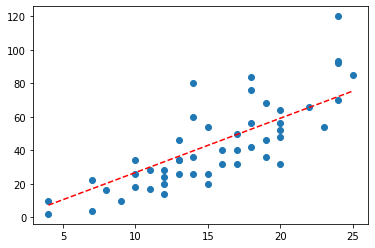

In [26]:
# 자동차 속도 대비 제동길이 예측선
plt.scatter(x_data, y_data)
plt.plot(x_data, hxFn(x_data), 'r--') # 예측선